# iSCAT Analysis Demo

In [1]:
from iscat_lib.simulators import HoppingDiffusion
from iscat_lib.analysis import Track, ListOfTracks

simulator_hop = HoppingDiffusion(Tmax=2.5, dt=1.0e-4, dL=10e-9, HL=1e-6, seed=42)
simulator_confined = HoppingDiffusion(Tmax=2.5, dt=1.0e-4, dL=10e-9, HL=1e-6, HP=0.0, seed=48)

list_tracks_hop = []
list_tracks_confined = []
for i in range(5):
    simulator_hop.run()
    simulator_confined.run()
    list_tracks_hop.append(Track.from_dict(simulator_hop.trajectory))
    list_tracks_confined.append(Track.from_dict(simulator_confined.trajectory))
    
tracks_hop = ListOfTracks(list_tracks_hop)
tracks_confined = ListOfTracks(list_tracks_confined)

Simulation: 100%|████████████████████████████████████████████████████████████| 25000/25000 [00:00<00:00, 130208.88it/s]


In [2]:
from iscat_lib.analysis import ModelDB
from iscat_lib.analysis.models import ModelBrownian, ModelHop, ModelConfined
ModelDB().add_model(ModelBrownian())
ModelDB().add_model(ModelHop())
ModelDB().add_model(ModelConfined())

In [3]:
tracks_hop.adc_analysis(num_workers=1, fit_max_time=50e-3, weighting='inverse_variance')
tracks_confined.adc_analysis(num_workers=1, fit_max_time=50e-3, weighting='inverse_variance')

[]

Load the tracks from some example data. We can use `tracks.normalize` to set the initial time value of all tracks to 0.

c:\users\john\projekte\iscat_analysis\iscat_lib\analysis\models.py:67: RuntimeWarning: divide by zero encountered in true_divide
  D_micro * (tau/t) * (1 - np.exp(-t / tau)) + \
c:\users\john\projekte\iscat_analysis\iscat_lib\analysis\models.py:67: RuntimeWarning: invalid value encountered in multiply
  D_micro * (tau/t) * (1 - np.exp(-t / tau)) + \
c:\users\john\projekte\iscat_analysis\iscat_lib\analysis\models.py:68: RuntimeWarning: divide by zero encountered in true_divide
  delta ** 2 / (2 * t * (1 - 2 * self.R * self.dt / t))
c:\users\john\projekte\iscat_analysis\iscat_lib\analysis\models.py:68: RuntimeWarning: invalid value encountered in multiply
  delta ** 2 / (2 * t * (1 - 2 * self.R * self.dt / t))
c:\users\john\projekte\iscat_analysis\iscat_lib\analysis\models.py:45: RuntimeWarning: divide by zero encountered in true_divide
  return D_micro * (tau/t) * (1 - np.exp(-t / tau)) + \
c:\users\john\projekte\iscat_analysis\iscat_lib\analysis\models.py:45: RuntimeWarning: invalid va

{'sectors': {'ModelConfined': 1.0},
 'average_params': {'ModelConfined': array([7.55887274e-13, 9.07822945e-09, 1.16361740e-01])},
 'average_msd': {'ModelConfined': array([3.49776373e-16, 6.64558329e-16, 9.77281056e-16, ...,
         5.73686667e-13, 5.76090000e-13, 5.79840000e-13])},
 'average_dapp': {'ModelConfined': array([1.31160893e-12, 9.96797620e-13, 9.16164342e-13, ...,
         5.73786127e-14, 5.76166825e-14, 5.79894126e-14])}}

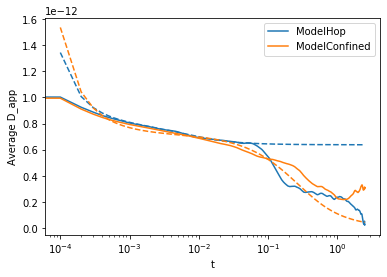

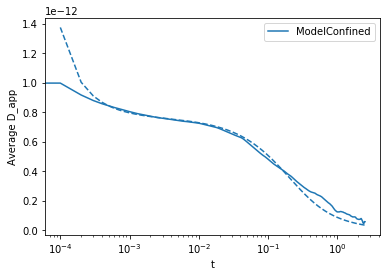

In [4]:
tracks_hop.summary(plot_dapp=True)
tracks_confined.summary(plot_dapp=True)

c:\users\john\projekte\iscat_analysis\iscat_lib\analysis\models.py:45: RuntimeWarning: divide by zero encountered in true_divide
  return D_micro * (tau/t) * (1 - np.exp(-t / tau)) + \
c:\users\john\projekte\iscat_analysis\iscat_lib\analysis\models.py:45: RuntimeWarning: invalid value encountered in multiply
  return D_micro * (tau/t) * (1 - np.exp(-t / tau)) + \
c:\users\john\projekte\iscat_analysis\iscat_lib\analysis\models.py:46: RuntimeWarning: divide by zero encountered in true_divide
  delta ** 2 / (2 * t * (1 - 2 * self.R * self.dt / t))
c:\users\john\projekte\iscat_analysis\iscat_lib\analysis\models.py:46: RuntimeWarning: invalid value encountered in multiply
  delta ** 2 / (2 * t * (1 - 2 * self.R * self.dt / t))
c:\users\john\projekte\iscat_analysis\iscat_lib\analysis\models.py:45: RuntimeWarning: divide by zero encountered in true_divide
  return D_micro * (tau/t) * (1 - np.exp(-t / tau)) + \
c:\users\john\projekte\iscat_analysis\iscat_lib\analysis\models.py:45: RuntimeWarni

{'sectors': {'ModelConfined': 1.0},
 'average_params': {'ModelConfined': array([1.e-10, 2.e-09, 1.e-03])},
 'average_msd': {'ModelConfined': array([3.49776373e-16, 6.64558329e-16, 9.77281056e-16, ...,
         5.73686667e-13, 5.76090000e-13, 5.79840000e-13])},
 'average_dapp': {'ModelConfined': array([1.31160893e-12, 9.96797620e-13, 9.16164342e-13, ...,
         5.73786127e-14, 5.76166825e-14, 5.79894126e-14])}}

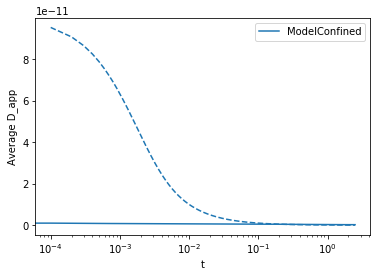

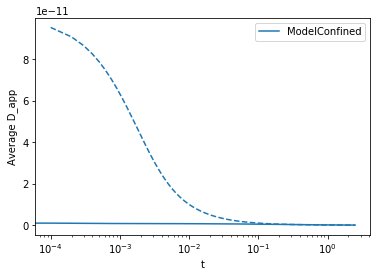

In [5]:
tracks_hop.adc_analysis(num_workers=1, fit_max_time=50e-3, weighting='disabled')
tracks_confined.adc_analysis(num_workers=1, fit_max_time=50e-3, weighting='disabled')
tracks_hop.summary(plot_dapp=True)
tracks_confined.summary(plot_dapp=True)